<a href='https://www.hexnbit.com/'> <img src='hexnbit.png'/> </a>

# Logistic Regression with Python

Using [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

Using this algorithm, we will try to predict if the person survived or not, the prediction will be based on the several other paramerters such as Age, Passenger Class, Gender etc.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Reding Data from Dataset

In [3]:
dataframe = pd.read_csv('titanic.csv')

In [4]:
dataframe.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
survival - Survival (0 = No; 1 = Yes)<br>

## Exploratory Data Analysis

### Checking for Missing Data

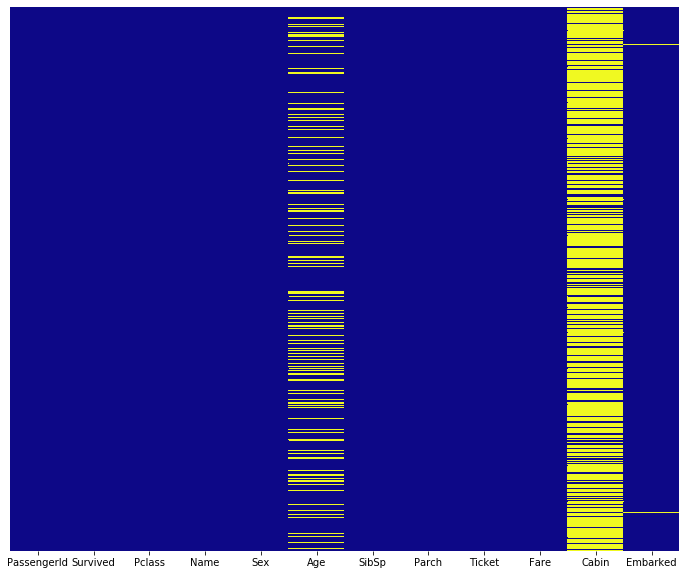

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False,cmap='plasma')   # creating heatmap for visual analysis

Some of the Age data is missing and can be filled with a certain value.
But, the Cabin column, has a lot of missing data and it is unlikely that we can process it therefore we will drop it.

### Plotting Data of Number of Survivers and Number of Non Survivers

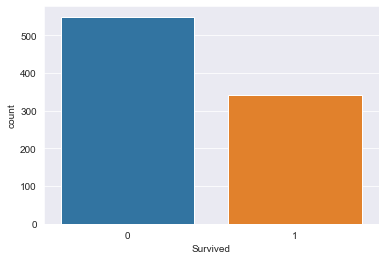

In [6]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=dataframe)

Number of survivors less than number of number of people who could not surivive

### Plotting Data of Number of Survivers and Number of Non Survivers based on genders

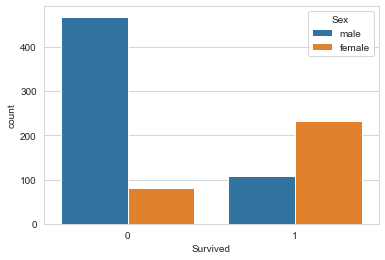

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dataframe)

Most of the people who did not survive were males, probably because children and females were rescued first

### Checking and Plotting Average Fare for all three Passenger Classes

Text(0, 0.5, 'Average Fare')

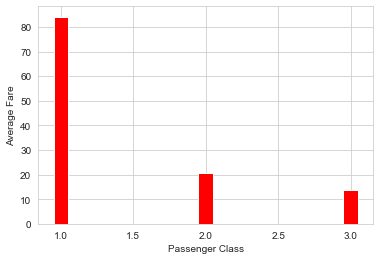

In [8]:
pas_class=dataframe.groupby(["Pclass"]).mean()
plt.bar(pas_class.index,pas_class["Fare"],width=0.1,color="r")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")

Average fare for Passenger Class 1 highest, followed by Passenger Class 2 and Passenger Class 3 is the cheapest

###  Plotting Survival rate for all three Passenger Classes

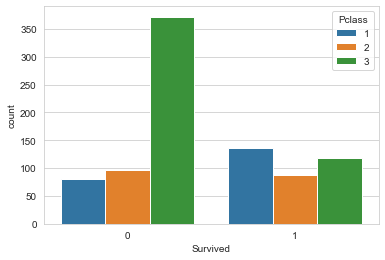

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataframe)

Passenger Class 3 had the maximum number of non survivors

###  Plotting Survival rate for all three Embarkment Locations

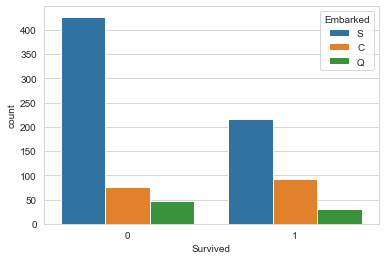

In [10]:
#C = Cherbourg; Q = Queenstown; S = Southampton
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=dataframe)

### Age Histogram

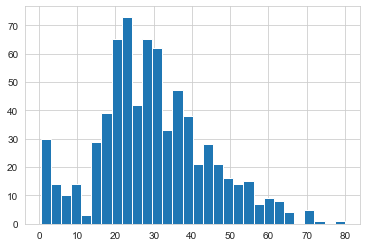

In [11]:
dataframe['Age'].hist(bins=30)

Lot of the travellers were below 35 years of Age

### Fare Histogram

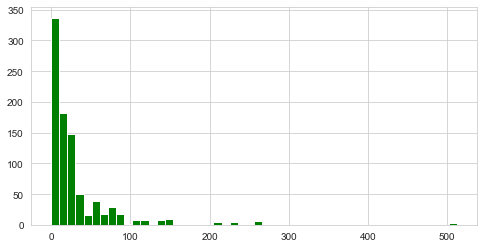

In [12]:
dataframe['Fare'].hist(color='green',bins=50,figsize=(8,4))

Most of the people were travelling at cheaper fares, probably beacause lot of people were from the younger generations

### Density Plot for Surviving Passengers and Non Surviving Passengers with Respect to Age

(-20, 200)

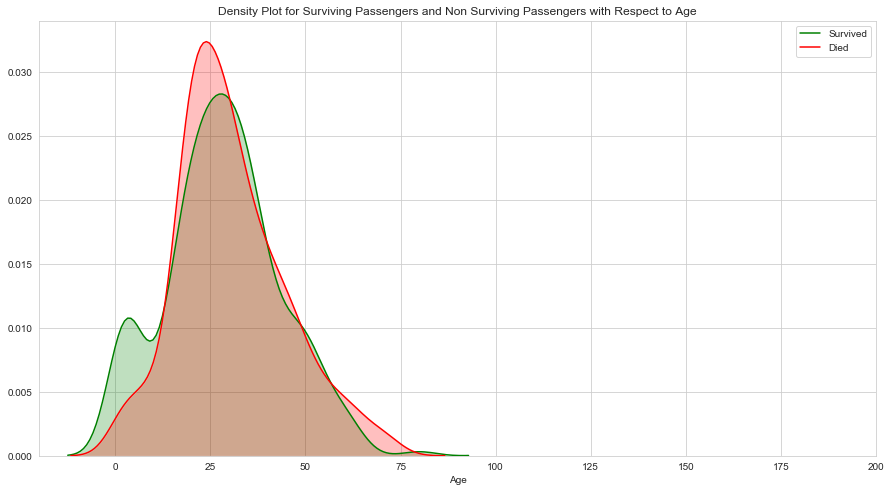

In [13]:
fig=plt.figure(figsize=(15,8))
axes=sns.kdeplot(dataframe["Age"][dataframe.Survived == 1], color="green", shade=True)
sns.kdeplot(dataframe["Age"][dataframe.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot for Surviving Passengers and Non Surviving Passengers with Respect to Age')
axes.set_xlabel('Age')
plt.xlim(-20,200)

Spike in graph for survival of children, probably they got rescued at higher priority

### Density Plot for Surviving Passengers and Non Surviving Passengers with Respect to Fare

(-20, 200)

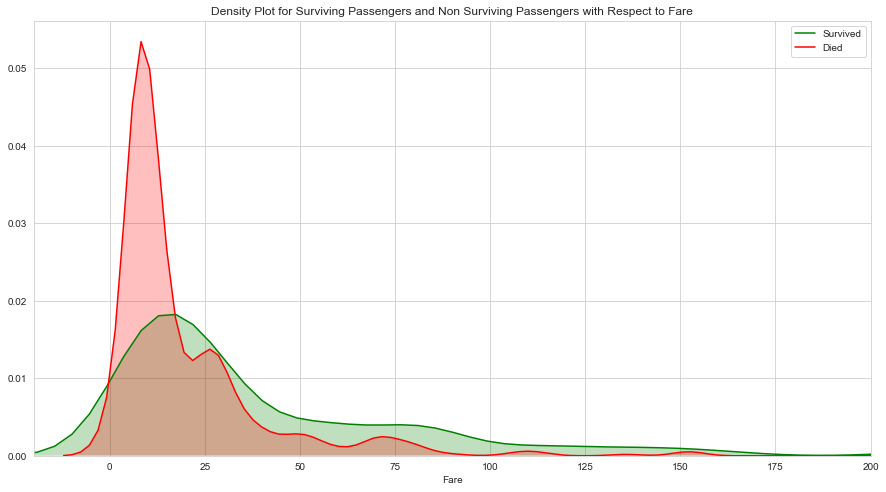

In [14]:
fig=plt.figure(figsize=(15,8))
axes=sns.kdeplot(dataframe["Fare"][dataframe.Survived == 1], color="green", shade=True)
sns.kdeplot(dataframe["Fare"][dataframe.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot for Surviving Passengers and Non Surviving Passengers with Respect to Fare')
axes.set_xlabel('Fare')
plt.xlim(-20,200)

Most of people who were travelling on lower fare could not survivie, we have already seen that the the survival rate was low in Passenger Class 3, and we also know that Passenger Class 3 was the cheapest

## Data Cleaning

In [15]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The column "PassengerId" is just a serial number and will not help with our prediction, therefore we will drop it.
Similarly, we will also remove Name and Ticket Columns as they are text columns along with the fact that as of now, we will not be able to relate them with the Survival Chance.

Also, as discussed earlier, Cabin column needs to be removed as lot of data is missing in that column

### Removing unwanted columns from Data Frame

In [16]:
dataframe.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


As the age data was missing for some of the rows, we can fill the missing age data with the mean age of all the passengers.

A better and way will be to fill the missing age with the average age by passenger class.

Therefore, grouping data as per the passenger class and getting mean values.

### Grouping Data Frame with respect to PClass and calulating mean

In [17]:
pas_class=dataframe.groupby(["Pclass"]).mean()

In [18]:
pas_class

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


### Box Plot to get an idea of mean age among PClass

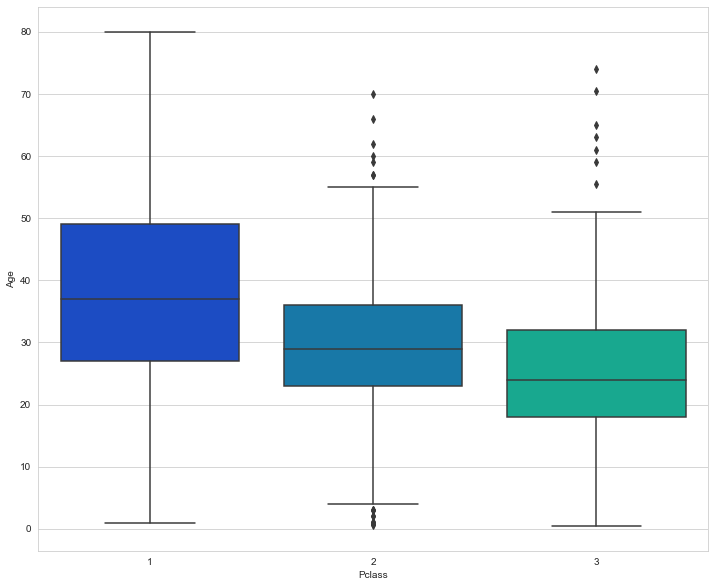

In [19]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='Pclass',y='Age',data=dataframe,palette='winter')

Passengers in the higher classes were older which is also relatable because older people were probably the ones who could afford the higher passenger classes.

### Creating Funciton which will substitute age based on Pclass

In [20]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
            #return pas_class.loc[1,"Age"]
        elif Pclass == 2:
            return 29
            #return pas_class.loc[2,"Age"] 
        else:
            return 25
            #return pas_class.loc[3,"Age"]
    else:
        return Age

In [21]:
dataframe['Age'] = dataframe[['Age','Pclass']].apply(fill_age,axis=1)

### Checking missing data

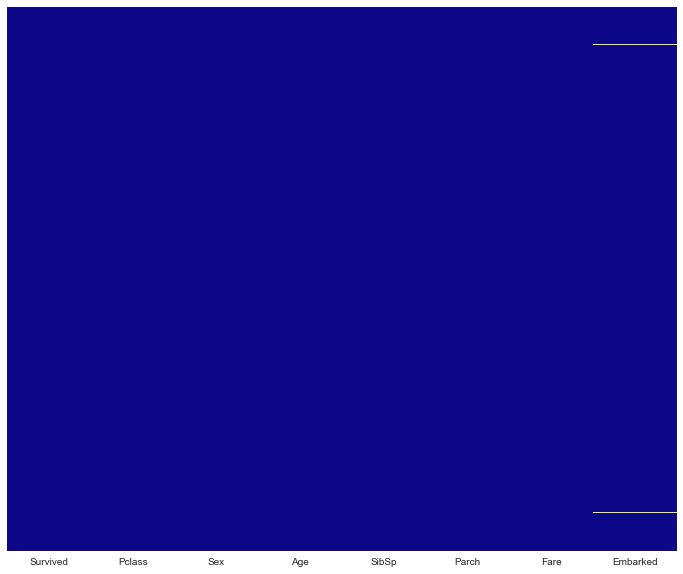

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [23]:
dataframe["Embarked"].isnull().value_counts()   # checking number of missing data counts

False    889
True       2
Name: Embarked, dtype: int64

Very little data missing in the embarked column, so we will remove these data points

### Dropping Missing Data

In [24]:
dataframe.dropna(inplace=True)

### Converting Categorical Features 

Converting categorical features to dummy variables using pandas so that our model is able to directly take in those features as inputs.

In [25]:
dataframe.head()    # for reference

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
dataframe["Embarked"].unique()  # checking values of unique data in Embarked Column

array(['S', 'C', 'Q'], dtype=object)

In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [28]:
# get_dummies function will return a representation of data columns in binary format columns
# drop_first will drop help the function to represent the data in unique-1 data columns
sex = pd.get_dummies(dataframe['Sex'],drop_first=True)
embark = pd.get_dummies(dataframe['Embarked'],drop_first=True)

In [29]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


### Removing the columns for which dummy variables have been created

In [31]:
dataframe.drop(['Sex','Embarked'],axis=1,inplace=True)

### Concatinating Dummy Variable Columns with Dataframe

In [32]:
dataframe = pd.concat([dataframe,sex,embark],axis=1)

In [33]:
dataframe.head()  # for reference

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression model

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('Survived',axis=1), 
                                                    dataframe['Survived'], test_size=0.30, 
                                                    random_state=101)

### Training and Predicting

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression(max_iter=800)
#logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting if the people from test data survived or not

In [38]:
predictions = logmodel.predict(X_test)

## Evaluation

Checking precision,recall,f1-score using classification report!

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
cnf_matrix=confusion_matrix(y_test,predictions)
cnf_matrix

array([[150,  13],
       [ 31,  73]], dtype=int64)

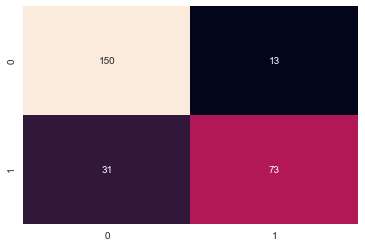

In [41]:
# creating heatmap for confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=False)

In [42]:
# printing classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



#### Picking up 1 set of data, checking its actual survival output, and feeding same set of data to our model and getting predicted output

In [43]:
index_num=0   # change this number to select row from testing data, 
              # number should be the an index for testing data frame, 
              # test data was formed randomly, hence the index is not continuous
print(X_test.iloc[index_num])
print("\n\nActually Survived or not survived",y_test.iloc[index_num])  # actual output data from dataset

Pclass     3.00
Age       25.00
SibSp      0.00
Parch      0.00
Fare       8.05
male       1.00
Q          0.00
S          1.00
Name: 511, dtype: float64


Actually Survived or not survived 0


In [44]:
test_sample=X_test.iloc[index_num].to_numpy().reshape(1,-1)
predicted_result = logmodel.predict(test_sample)
print("Prediction Result:",predicted_result)         # predicted data

Prediction Result: [0]


### Prediction Probability

In [45]:
predict_prob = logmodel.predict_proba(X_test)[:,1]
predict_prob

array([0.10904023, 0.13300835, 0.76511832, 0.92035674, 0.13447703,
       0.03317749, 0.11698071, 0.23099502, 0.07464129, 0.59125231,
       0.78172029, 0.95461103, 0.10901573, 0.59765187, 0.10927087,
       0.13096537, 0.9142054 , 0.8271996 , 0.54610667, 0.10117691,
       0.1091376 , 0.08879597, 0.40673809, 0.32094993, 0.05790507,
       0.459803  , 0.64269163, 0.49649826, 0.12414824, 0.32121475,
       0.10454419, 0.24893728, 0.01534794, 0.10897668, 0.11306605,
       0.1318041 , 0.7020519 , 0.05678749, 0.12331206, 0.11542241,
       0.53252859, 0.15112335, 0.12627869, 0.93533251, 0.61325497,
       0.10717833, 0.6345318 , 0.88831445, 0.10466721, 0.27837065,
       0.50027019, 0.79415004, 0.16860665, 0.13133659, 0.10888142,
       0.06643346, 0.44461956, 0.08375284, 0.10242084, 0.91250426,
       0.59125231, 0.94270974, 0.88766831, 0.09169937, 0.18101369,
       0.04137412, 0.1216583 , 0.42771446, 0.05039514, 0.10819849,
       0.35216037, 0.14568872, 0.62283563, 0.88535209, 0.07441

### Printing Survival Probabilty of the above selected passenger

In [46]:
predict_sample_prob = logmodel.predict_proba(test_sample)[:,1]
predict_sample_prob

array([0.10904023])

### Scatter Plot of Predicted Surivors and Non Survivors wrt to age

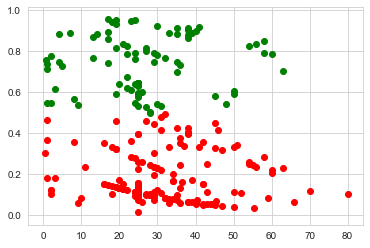

In [47]:
plt.scatter(X_test["Age"][predictions==0],predict_prob[predictions==0],color="red")
plt.scatter(X_test["Age"][predictions==1],predict_prob[predictions==1],color="green")

### Manually Thresholding Probability
Might be useful in other applications

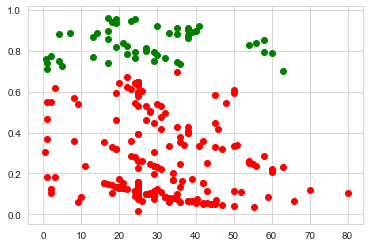

In [48]:
plt.scatter(X_test["Age"][predict_prob<=0.7],predict_prob[predict_prob<=0.7],color="red")
plt.scatter(X_test["Age"][predict_prob>0.7],predict_prob[predict_prob>0.7],color="green")